# MNIST Handwritten Digit Classifier - Identify Number from Cropped Image

Given a dataset of 6,000 images of handwritten digits that have beeen cropped in half randomly, train a neural network to identify the number.

In [1]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1/3)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 28, 28)
(49000,)
(14000, 28, 28)
(14000,)
(7000, 28, 28)
(7000,)


Crop the images to 14x14 pixels randomly.

In [5]:
from numpy.random import randint

In [6]:
start_row = randint(0, 14)
start_col = randint(0, 14)

print(start_row)
print(start_col)

7
8


In [7]:
X_train = X_train[:, start_row:start_row+14, start_col:start_col+14]
X_val = X_val[:, start_row:start_row+14, start_col:start_col+14]
X_test = X_test[:, start_row:start_row+14, start_col:start_col+14]

Show some example digits.

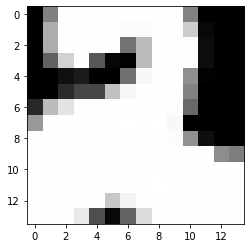

In [8]:
plt.imshow(X_train[1], cmap='gray')

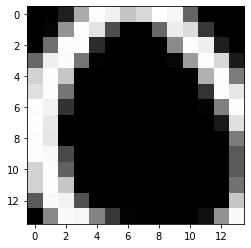

In [9]:
plt.imshow(X_train[2], cmap='gray')

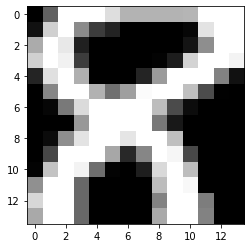

In [10]:
plt.imshow(X_val[1], cmap='gray')

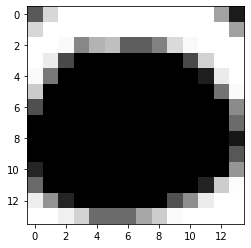

In [11]:
plt.imshow(X_val[2], cmap='gray')

Prepare features and target for training.

In [12]:
image_height,image_width = 14, 14

X_train = X_train.reshape(49000, image_height*image_width)
X_val = X_val.reshape(14000, image_height*image_width)
X_test = X_test.reshape(7000, image_height*image_width)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 196)
(14000, 196)
(7000, 196)


In [13]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(49000, 10)
(14000, 10)
(7000, 10)


Train a neural network with 2 hidden layers of 64 nodes each.

In [14]:
model = Sequential()

In [15]:
model.add(Dense(16, activation='relu', input_shape=(196,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                3152      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 3,594
Trainable params: 3,594
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1694 - accuracy: 0.7243 - val_loss: 0.1010 - val_accuracy: 0.8568
Epoch 2/20
1532/1532 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.8756 - val_loss: 0.0764 - val_accuracy: 0.8848
Epoch 3/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.8947 - val_loss: 0.0672 - val_accuracy: 0.8979
Epoch 4/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0608 - accuracy: 0.9064 - val_loss: 0.0612 - val_accuracy: 0.9057
Epoch 5/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0552 - accuracy: 0.9159 - val_loss: 0.0566 - val_accuracy: 0.9126
Epoch 6/20
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0519 - accuracy: 0.9208 - val_loss: 0.0541 - val_accuracy: 0.9153
Epoch 7/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9248 - val_loss: 0.0522 - val_accuracy:

Evaluate the model performance.

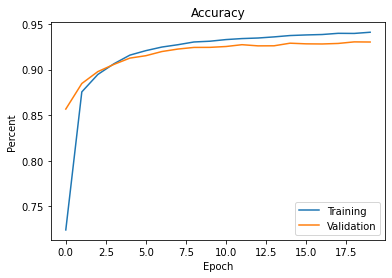

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'])

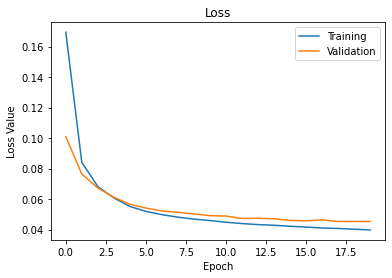

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Validation'])

In [21]:
score = model.evaluate(X_test, y_test)
score

219/219 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9280


[0.04530445113778114, 0.9279999732971191]